**Read the dataset**

In [23]:
import pandas as pd
playstore = pd.read_csv("googleplaystore.csv")

In [24]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [25]:
playstore.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [26]:
playstore.drop(10472, axis = 0, inplace = True) #since we our goal is to improve the revenue of underpriced app, we don't care about free apps, so we will delete that observation from our database

In [27]:
print(playstore['Size'].value_counts())

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64


In [28]:
print(playstore['Reviews'].value_counts())

0         596
1         272
2         214
3         175
4         137
         ... 
4272        1
5517        1
4057        1
459797      1
398307      1
Name: Reviews, Length: 6001, dtype: int64


In [29]:
print(playstore['Price'].value_counts())

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64


## Cleaning the Data

**We notice that there are several columns which should have a numeric format but whose type is object. Specifically, Reviews, Size, and Price. For the reviews column haven deleted the above observation earlier, solved the problem. 
As for size, we will get rid of values like M and K which are SI units for data-size; for price, some of the values have $, so we will get rid of them.**

In [30]:
playstore["Price"] = playstore["Price"].str.replace("$", "").astype("float")  #Removed the $ and converted it to float

C:\Users\user\AppData\Local\Temp\ipykernel_17348\3075235603.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore["Price"] = playstore["Price"].str.replace("$", "").astype("float")  #Removed the $ and converted it to float


In [32]:
paid_apps = playstore[playstore['Price'] != 0].copy() #Filtered the data to return only paid apps

In [33]:
paid_apps.drop("Type", axis = 1, inplace=True) #Drop the Type column 

In [34]:
paid_apps['Reviews'] = paid_apps['Reviews'].astype("int") #convert the review column to interger type

**To clean the size column, i'll create a function that takes in the values of price column as an input and returns a float number representing the price in megabytes.**

In [35]:
def clean_size(size):
    """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = pd.np.NaN
    else:
        size = float(size)
    return size

In [36]:
paid_apps['Size'] = paid_apps['Size'].apply(clean_size) #Apply thefunction to the Size column

C:\Users\user\AppData\Local\Temp\ipykernel_17348\2432529512.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  size = pd.np.NaN


In [37]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    int32  
 4   Size            724 non-null    float64
 5   Installs        800 non-null    object 
 6   Price           800 non-null    float64
 7   Content Rating  800 non-null    object 
 8   Genres          800 non-null    object 
 9   Last Updated    800 non-null    object 
 10  Current Ver     798 non-null    object 
 11  Android Ver     799 non-null    object 
dtypes: float64(3), int32(1), object(8)
memory usage: 78.1+ KB


## Removing Dupplicates.

The following apps Fuzzy Numbers: Pre-K Number Foundation and Toca Life: City, which both appear with the categories EDUCATION and FAMILY categoty have been deemed incorrect by the Database administrator, the FAMILY categoty isn't correct; so we will drop them.

In [40]:
app_mask = paid_apps["App"].isin(["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"])

category_mask = paid_apps["Category"] == "FAMILY"

paid_apps[app_mask & category_mask]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2151,Toca Life: City,FAMILY,4.7,31100,24.0,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up


Now that we've identified the labels, we can drop these rows:

In [41]:
paid_apps.drop([2151, 4301], inplace=True)

**next we will drop duplicates from the data**

In [43]:
print("Number of rows before dropping duplicates: {}".format(paid_apps.shape[0]))
paid_apps.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates: {}".format(paid_apps.shape[0]))

Number of rows before dropping duplicates: 798
Number of rows after dropping duplicates: 763


In [47]:
print(paid_apps.duplicated("App").sum())

7


next we will drop the duplicates whose number of reviews are not the highest.

In [50]:
paid_apps.sort_values("Reviews", ascending = False, inplace = True) #Sort by the number of reviews in descending order
paid_apps.drop_duplicates(subset = "App", keep = "first", inplace = True)
print("Number of duplicated Apps after: {}".format(paid_apps.duplicated("App").sum()))
paid_apps.reset_index(drop= True, inplace = True)

Number of duplicated Apps after: 0


## Exploring the price

**Haven cleaned the data, it's time to carry out some data exploration.** 

We need to get to know the price data before contemplating what proxy to use to approximate the concept of undervalued apps.

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

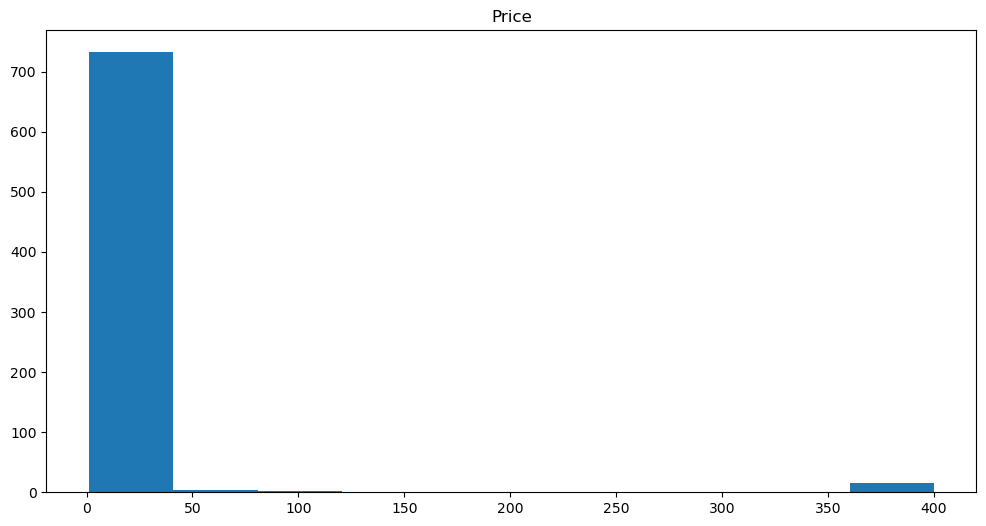

In [51]:
paid_apps.hist(column="Price", grid=False, figsize=(12,6))

The distributions of prices is heavily skewed to the right and we have a few outliers 

In [53]:
paid_apps.sort_values("Price", ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
277,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856,8.7,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
355,I am rich (Most expensive app),FINANCE,4.1,129,2.7,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
371,I am Rich!,FINANCE,3.8,93,22.0,"1,000+",399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
155,I Am Rich Premium,FINANCE,4.1,1867,4.7,"50,000+",399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
314,I am Rich,FINANCE,4.3,180,3.8,"5,000+",399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
307,I Am Rich Pro,FAMILY,4.4,201,2.7,"5,000+",399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
125,I am rich,LIFESTYLE,3.8,3547,1.8,"100,000+",399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
442,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,"1,000+",399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
563,most expensive app (H),FAMILY,4.3,6,1.5,100+,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up


**It's clear that the vast majority of apps have a price significantly below $50, and given how very niche and disparate the prices are from the others. They won't be included in our analysis.**

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

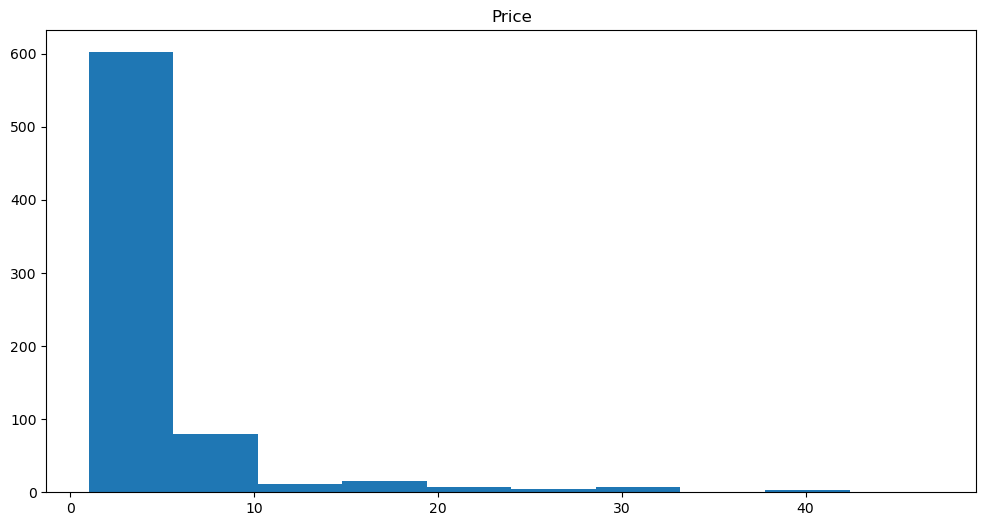

In [55]:
affordable_apps = paid_apps[paid_apps["Price"]<50].copy()
affordable_apps.hist(column="Price", grid=False, figsize=(12,6))

Even though we got rid of the outliers, it is still quite skewed. Its clear that apps costing less $5 account for most of the purchases, Let's explore these differences.

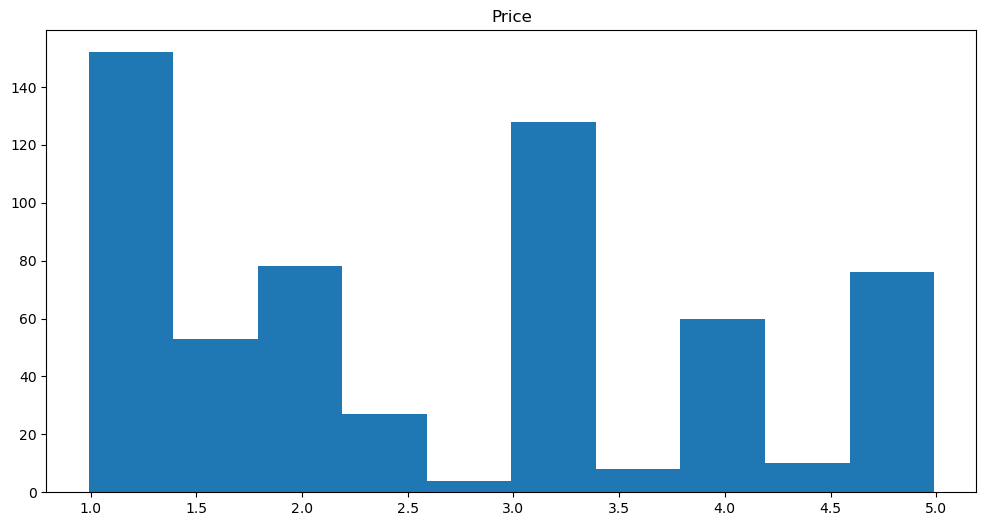

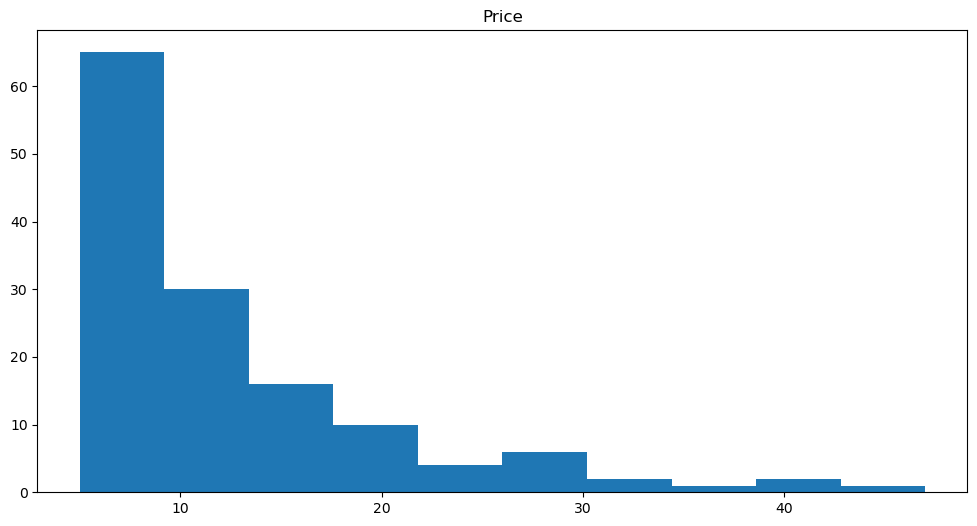

In [58]:
cheap = affordable_apps["Price"] < 5
reasonable = affordable_apps["Price"] >= 5
affordable_apps[cheap].hist(column = "Price", grid = False, figsize = (12,6))
affordable_apps[reasonable].hist(column = "Price", grid = False, figsize = (12,6))
affordable_apps['affordability'] = affordable_apps['Price'].apply(lambda x: 'cheap' if x < 5 else 'reasonable')

we can see that the reasonable apps are still somewhat skewed, although much less so than the dataset as a whole

**Having visualized the price behavior by itself, it's time to compare it to the other columns. Let's start by visualizing how price relates to rating, to see if there's any correlation**

## Price vs. Rating

<AxesSubplot:xlabel='Price', ylabel='Rating'>

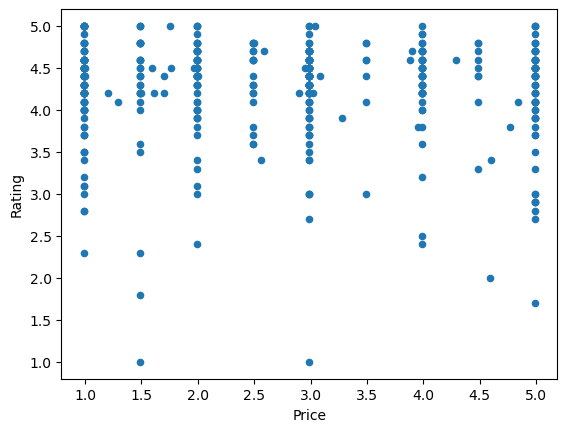

In [59]:
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

In [60]:
print(affordable_apps[cheap].corr().loc["Rating", "Price"])

-0.055937715054631215


we see that there doesn't seem to be any clear relation between price and rating for the cheap apps.

**it suggests that we can change prices without it being reflected in the apps' rating.**

lets take a look at the relationshio between affordable_apps[reasonable] price and rating

<AxesSubplot:xlabel='Price', ylabel='Rating'>

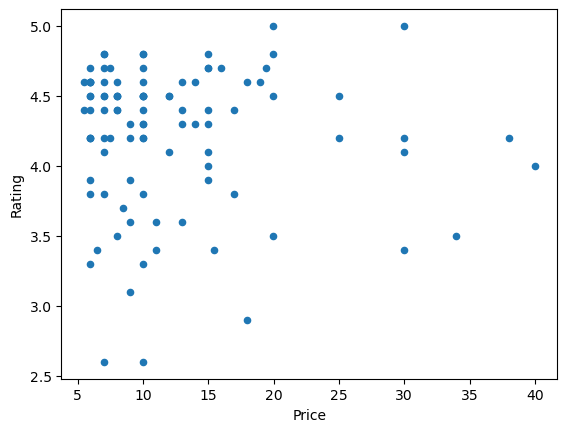

In [61]:
affordable_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")

In [62]:
print(affordable_apps[reasonable].corr().loc["Rating", "Price"])

-0.04860964708513042


**we can also conclude that for reasonable apps, there's also no correlation between price and rating, next we will find the average price of both cheap and reasonable price and use those figures to do some data transformation on the affordable apps data.**

In [63]:
cheap = affordable_apps["Price"] < 5
reasonable = affordable_apps["Price"] >= 5
cheap_mean = affordable_apps.loc[cheap,'Price'].mean()
affordable_apps.loc[cheap, "price_criterion"] = affordable_apps['Price'].apply(lambda x: 1 if x < cheap_mean else 0)
reasonable_mean = affordable_apps.loc[reasonable, 'Price'].mean()
affordable_apps.loc[reasonable, "price_criterion"] = affordable_apps['Price'].apply(lambda x: 1 if x < reasonable_mean else 0)

For only the cheap apps, create a column in affordable_apps called price_criterion that takes the value 1 when the app's price is lower than cheap_mean, and 0 otherwise. same thing we did for the reasonable apps.

In [64]:
affordable_apps['affordability'].value_counts()

cheap         596
reasonable    137
Name: affordability, dtype: int64

## Price VS Category and Genres

**In the interest of getting some quick results for our prototype, we'll now focus on the categories and genres, leaving other features for another time.**

In [68]:
affordable_apps['Genres'].unique()

array(['Arcade;Action & Adventure', 'Action', 'Strategy',
       'Puzzle;Brain Games', 'Card;Action & Adventure', 'Sports',
       'Personalization', 'Arcade', 'Puzzle', 'Productivity', 'Weather',
       'Tools', 'Sports;Action & Adventure', 'Communication',
       'Role Playing', 'Photography', 'Card', 'Simulation;Education',
       'Adventure', 'Education;Pretend Play', 'Lifestyle',
       'Strategy;Action & Adventure', 'Board', 'Finance',
       'Health & Fitness', 'Role Playing;Action & Adventure', 'Music',
       'Travel & Local', 'Business', 'Simulation',
       'Adventure;Action & Adventure', 'Parenting',
       'Adventure;Brain Games', 'Entertainment', 'Maps & Navigation',
       'Video Players & Editors', 'Racing', 'Medical', 'Auto & Vehicles',
       'Educational;Pretend Play', 'Casual;Pretend Play',
       'Education;Creativity', 'Education', 'Board;Brain Games',
       'Food & Drink', 'Action;Action & Adventure',
       'Simulation;Pretend Play', 'Dating', 'Books & Referenc

In [67]:
affordable_apps["Category"].unique()

array(['FAMILY', 'GAME', 'SPORTS', 'PERSONALIZATION', 'PRODUCTIVITY',
       'WEATHER', 'TOOLS', 'COMMUNICATION', 'PHOTOGRAPHY', 'EDUCATION',
       'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS', 'TRAVEL_AND_LOCAL',
       'BUSINESS', 'PARENTING', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'VIDEO_PLAYERS', 'MEDICAL', 'AUTO_AND_VEHICLES', 'FOOD_AND_DRINK',
       'DATING', 'BOOKS_AND_REFERENCE', 'ART_AND_DESIGN', 'SHOPPING',
       'SOCIAL', 'NEWS_AND_MAGAZINES', 'LIBRARIES_AND_DEMO'], dtype=object)

Looking at the unique values of the Genre's column, we see that multiple genres are separated by ;, Let's create a column that counts the number of genres to which each app belongs. those with ';' will have a value of 2 and those without will have 1.

In [69]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

In [71]:
affordable_apps["genre_count"].value_counts()

1    663
2     70
Name: genre_count, dtype: int64

**Let's now see how the mean price varies across the number of genres.**

In [72]:
genres_mean = affordable_apps.groupby(
    ["affordability", "genre_count"]
).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

surprisingly, apps that belong to two genres are more expensive among the cheap apps and cheaper among the reasonable apps

**For each segment, let's label the apps that cost less than their corresponding segments' mean with 1, and the others with 0, we will create a funcion to do this and apply it to our affordable_app dataframe**

In [73]:
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis="columns"
)

**Next we will carry out the same the same procedure for Category as we did for genre_count.**

In [75]:
category_mean = affordable_apps.groupby(["affordability", "Category"]).mean()[['Price']]
category_mean

Price
affordability Category                      
cheap         ART_AND_DESIGN        1.990000
              AUTO_AND_VEHICLES     1.740000
              BOOKS_AND_REFERENCE   2.529286
              BUSINESS              3.632857
              COMMUNICATION         2.428846
              DATING                3.115000
              EDUCATION             3.990000
              ENTERTAINMENT         3.990000
              FAMILY                2.754740
              FINANCE               3.490000
              FOOD_AND_DRINK        4.240000
              GAME                  2.547222
              HEALTH_AND_FITNESS    3.035455
              LIBRARIES_AND_DEMO    0.990000
              LIFESTYLE             2.895000
              MAPS_AND_NAVIGATION   1.656667
              MEDICAL               2.764286
              NEWS_AND_MAGAZINES    1.990000
              PARENTING             4.790000
              PERSONALIZATION       1.689873
              PHOTOGRAPHY           3.023571
              PRODUCTIVITY          2.635909
              SHOPPING              2.740000
              SOCIAL                0.990000
              SPORTS                2.773636
              TOOLS                 2.596056
              TRAVEL_AND_LOCAL      2.942222
              VIDEO_PLAYERS         1.490000
              WEATHER               3.240000
reasonable    AUTO_AND_VEHICLES     9.990000
              BOOKS_AND_REFERENCE   6.025714
              BUSINESS             14.967500
              COMMUNICATION        19.990000
              DATING                7.490000
              EDUCATION             5.990000
              FAMILY               15.426800
              FINANCE              21.240000
              GAME                 10.091000
              HEALTH_AND_FITNESS    7.740000
              LIFESTYLE            17.323333
              MAPS_AND_NAVIGATION  10.990000
              MEDICAL              13.805789
              PERSONALIZATION       8.490000
              PHOTOGRAPHY          15.190000
              PRODUCTIVITY          7.590000
              SOCIAL               13.990000
              SPORTS               19.490000
              TOOLS                11.847143
              TRAVEL_AND_LOCAL      7.823333
              VIDEO_PLAYERS         5.990000
              WEATHER               6.490000

In [76]:
def label_category(row):
    """For each segment in `category_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]

    if price < category_mean.loc[(aff, cat)][0]:
        return 1
    else:
        return 0

affordable_apps["category_criterion"] = affordable_apps.apply(
    label_category, axis="columns"
)

## Results and Impact

**We now have three binary criteria to helps decide whether or not an app's price should increase, We can use a technique called majority voting, in which we decide whether an app's price should increase based on all criteria.
Let's create a column in affordable_apps that takes the value of 1 when the majority is 1 and the value of 0 when the majority is 0.**

In [77]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')

affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
81,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,cheap,0.0,1,0,0,0.0
738,Visualmed,MEDICAL,NaN,0,3.1,1+,2.99,Everyone,Medical,"August 1, 2018",1.0,4.1 and up,cheap,0.0,1,0,0,0.0
554,Jetting for Honda CR dirt bike,SPORTS,4.1,7,3.4,100+,3.49,Everyone,Sports,"April 13, 2016",2.2,3.0 and up,cheap,0.0,1,0,0,0.0
240,Acupuncture Assistant,MEDICAL,4.5,492,39.0,"10,000+",7.99,Everyone,Medical,"April 13, 2018",4.4.5,4.1 and up,reasonable,1.0,1,1,1,1.0
362,Officiel du SCRABBLE LAROUSSE,BOOKS_AND_REFERENCE,3.4,116,48.0,"5,000+",4.60,Everyone,Books & Reference,"October 13, 2016",1.4,2.3 and up,cheap,0.0,1,0,0,0.0


 Let's see how many apps are eligible for a price increase:

In [79]:
nr_eligible = affordable_apps["Result"].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0] * 100, sep="\n")

401.0
54.70668485675307


**We can see that 401 apps - approximately 55% are elligible for price increae. This is a significant number, and we consider the possibility that increasing the price for these apps will have a significant impact.
In an ideal world, we'd have the data for how many times each app was bought, but we don't.
We could potentially fall back on the number of installations as a proxy for this, but unfortunately, our Installs column just gives us ranges and not exact numbers.
In any case, given the lack of options, we'll fall back on this obviously faulty proxy in order to estimate the impact.**

**The lack of data also makes it hard to decide what the optimal price for each app is(although it's not the main goal of this prototype).  Instead, we'll use the mean price of the affordability of the eligible apps when it is higher than the current price, or we use the max price in each segment.**

In [80]:
def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)
    
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis="columns")

affordable_apps["Installs"] = affordable_apps["Installs"].str.replace("[+,]", "").astype(int)

affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]

total_impact = affordable_apps["Impact"].sum()
print(total_impact)

115441618.98


C:\Users\user\AppData\Local\Temp\ipykernel_17348\4031261359.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  affordable_apps["Installs"] = affordable_apps["Installs"].str.replace("[+,]", "").astype(int)


**We computed the minimum estimated impact. Minimum because the number of installations represents the low end of the range — it's not the actual number of installations.
Our result was north of $115 million! This is too optimistic, especially considering that people can install the app, use the freeware version and not pay at all.**